# Fuel Consumption Prediction Model

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline


In [4]:
url = 'https://open.canada.ca/data/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/b6100f60-5e63-437d-b122-db76c467c0a7/download/my2023-fuel-consumption-ratings.csv'

dataset = requests.get(url)

with open('fuel_consumption.csv', 'r') as file:
    data = file.read()
    print(data) 
    # with open('fuel_consumption.csv', 'w') as file:
    #     file.write(dataset.text)         // this is to write the data to a file and this is also working fine
    

Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating

2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7

2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7

2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6

2023,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5

2023,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5

2023,Acura,RDX SH-AWD,Sport utility vehicle: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6

2023,Acura,RDX SH-AWD A-SPEC,Sport utility vehicle: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6

2023,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7

2023,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7

2023,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256,5,5

202

In [21]:
df = pd.read_csv('fuel_consumption.csv', encoding='latin1')
df[:100]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023,BMW,M4 CSL Coupe,Subcompact,3.0,6,AS8,Z,15.0,10.3,12.9,22,301,4,5
96,2023,BMW,M440i xDrive Cabriolet,Subcompact,3.0,6,AS8,Z,10.6,7.7,9.3,30,216,5,5
97,2023,BMW,M440i xDrive Coupe,Subcompact,3.0,6,AS8,Z,10.7,7.6,9.3,30,216,5,5
98,2023,BMW,M5 Sedan,Mid-size,4.4,8,AS8,Z,16.1,11.1,13.8,20,324,3,3


Data Summury 

In [25]:
df.describe() 

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,833.0,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2023.0,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,0.0,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,2023.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2023.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,2023.0,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,2023.0,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,2023.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [41]:
mdf = df[ ['Engine size (L)','Cylinders','Combined (L/100 km)','CO2 emissions (g/km)'] ]
mdf

,Engine size (L),Cylinders,Combined (L/100 km),CO2 emissions (g/km)
0,1.5,4,7.2,167
1,1.5,4,7.4,172
2,1.5,4,7.8,181
3,3.5,6,11.2,263
4,3.0,6,12.4,291
...,...,...,...,...
828,2.0,4,9.2,215
829,2.0,4,9.4,218
830,2.0,4,10.0,233
831,2.0,4,9.6,223


In [39]:
#mdf.rename(columns={'Combined (L/100 km)':'Fuel_consumption (L/100km)'}, inplace=True)
#mdf

In here I'm creating a plot for getting an idea about the distribution using matplotlib

we can get an idea through that about the count conist of each an element. 

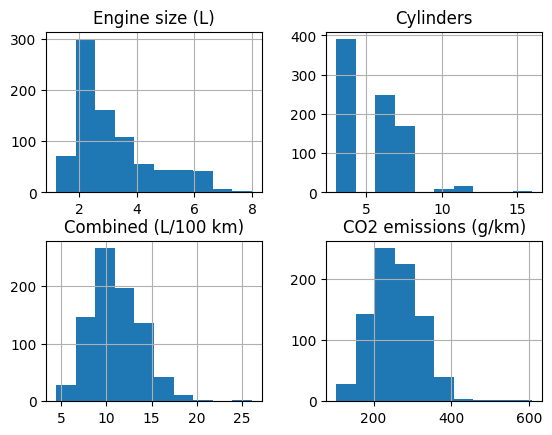

In [42]:
viz = mdf[ ['Engine size (L)','Cylinders','Combined (L/100 km)','CO2 emissions (g/km)'] ]
viz.hist()
plt.show()

Each feature plot against the emmision 

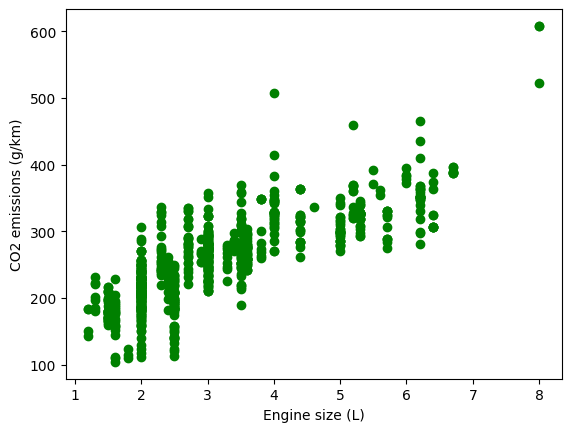

In [53]:

plt.scatter(mdf['Engine size (L)'], mdf['CO2 emissions (g/km)'], color='green')
plt.xlabel("Engine size (L)")
plt.ylabel("CO2 emissions (g/km)")
plt.show()

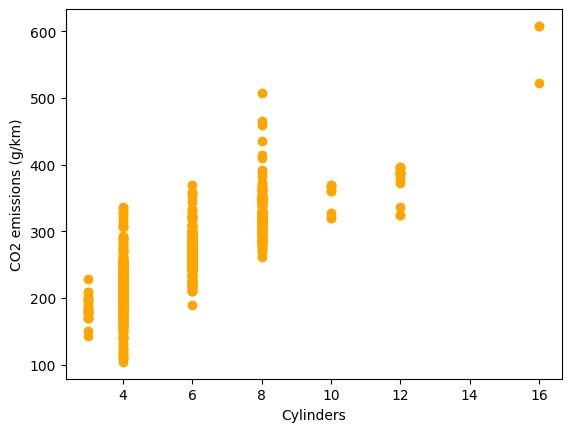

In [55]:
plt.scatter(mdf['Cylinders'], mdf['CO2 emissions (g/km)'], color='orange')
plt.xlabel("Cylinders")
plt.ylabel("CO2 emissions (g/km)")
plt.show()

# Creating and testing data